<a href="https://colab.research.google.com/github/arnavrai09/ConcreteStrengthPrediction/blob/master/Concrete_Compressive_Strength_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
file_path = '/content/Concrete_Data.xls'
data = pd.read_excel(file_path)

In [25]:
print(data.isnull().sum())

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64


In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data.iloc[:, :-1] = scaler.fit_transform(data.iloc[:, :-1])

In [27]:
print(data.head())

   Cement (component 1)(kg in a m^3 mixture)  \
0                                   2.477918   
1                                   2.477918   
2                                   0.491443   
3                                   0.491443   
4                                  -0.790432   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                          -0.856886       
1                                          -0.856886       
2                                           0.795533       
3                                           0.795533       
4                                           0.678414       

   Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                   -0.847132   
1                                   -0.847132   
2                                   -0.847132   
3                                   -0.847132   
4                                   -0.847132   

   Water  (component 4)(kg in a m^3 mixture)  \
0      

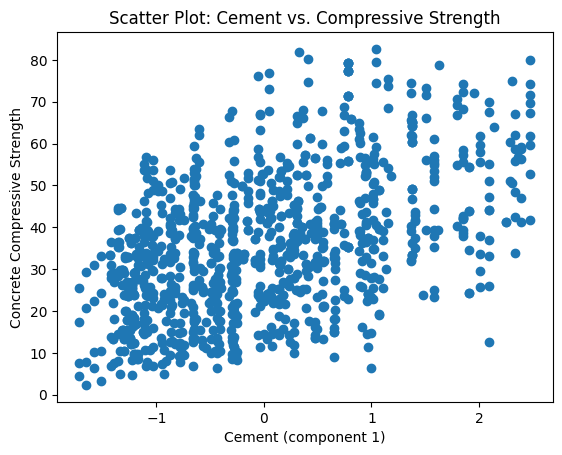

In [28]:
import matplotlib.pyplot as plt

plt.scatter(data['Cement (component 1)(kg in a m^3 mixture)'], data['Concrete compressive strength(MPa, megapascals) '])
plt.xlabel('Cement (component 1)')
plt.ylabel('Concrete Compressive Strength')
plt.title('Scatter Plot: Cement vs. Compressive Strength')
plt.show()

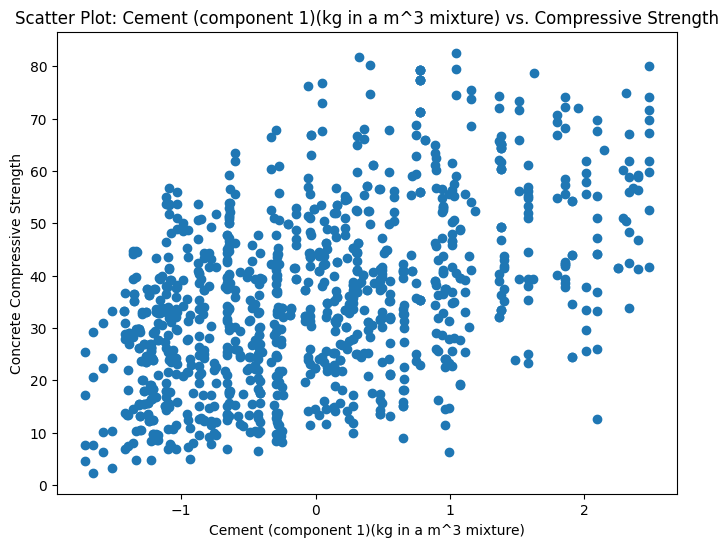

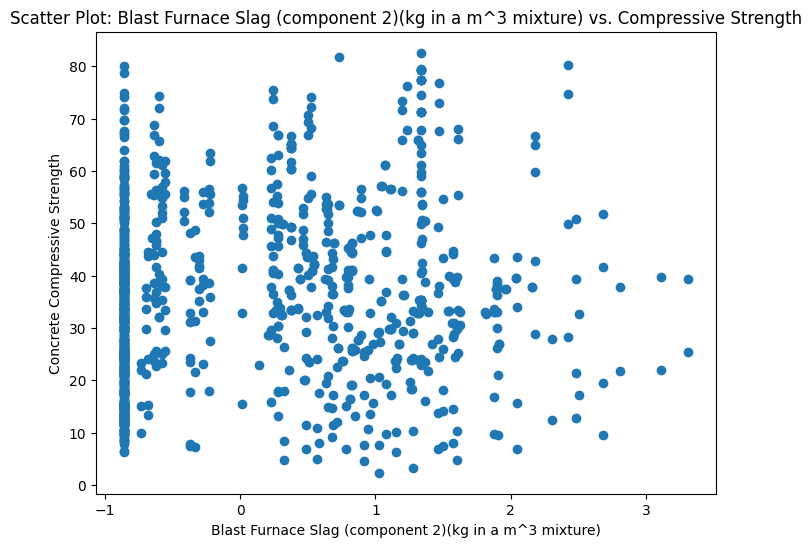

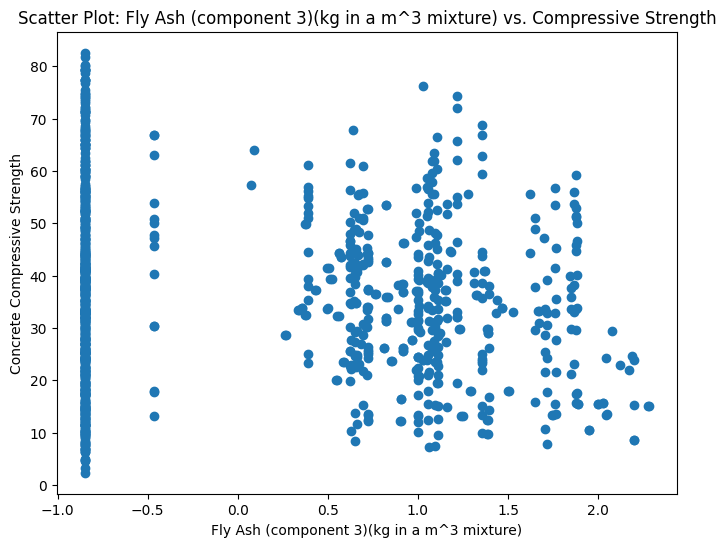

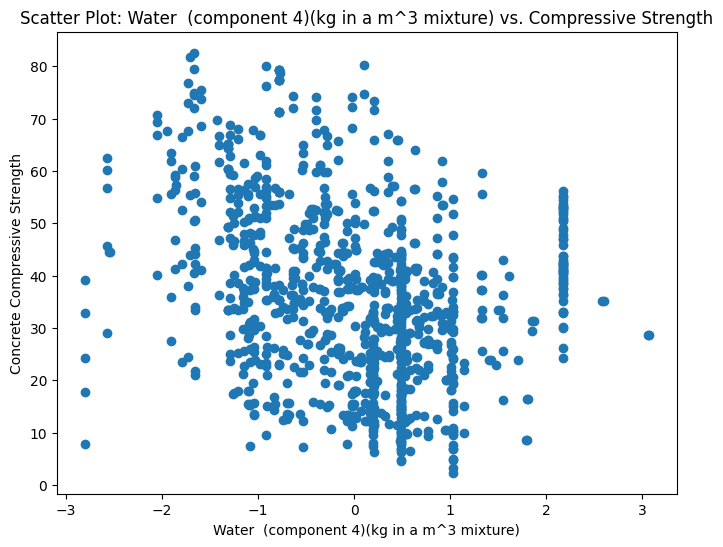

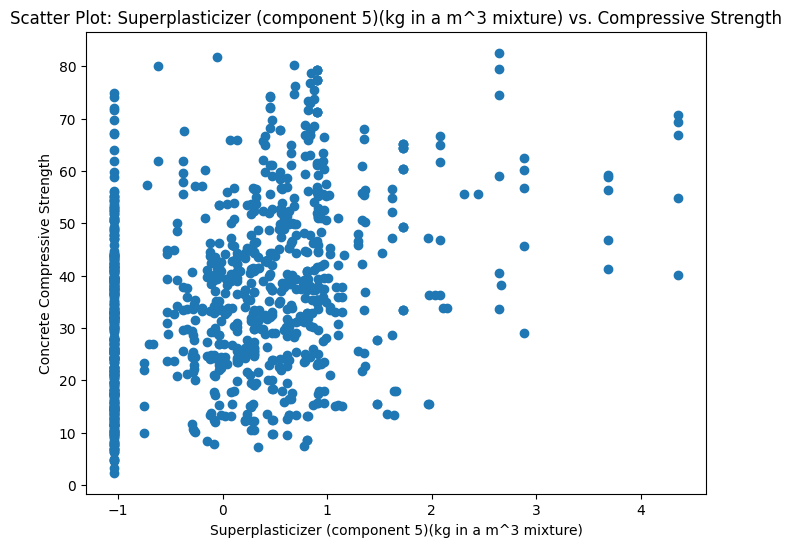

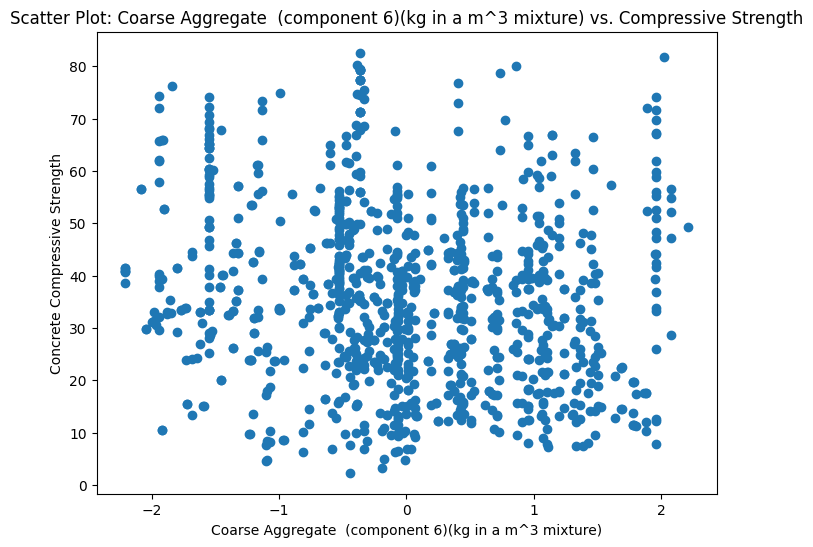

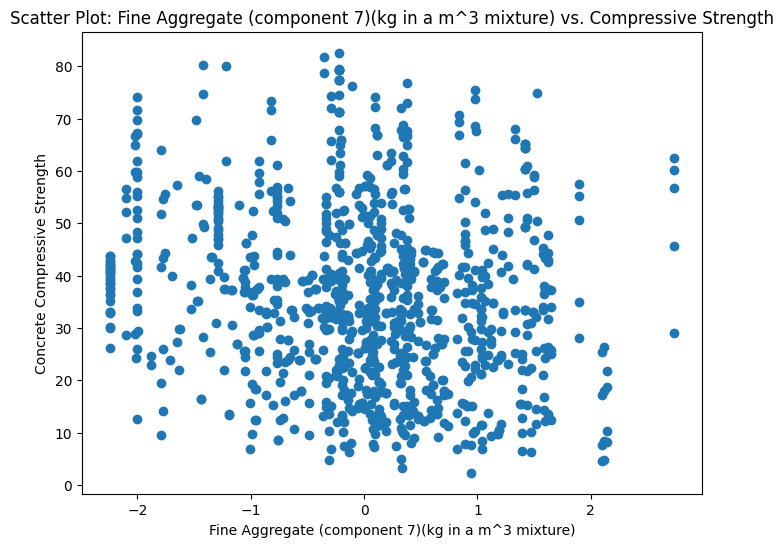

In [29]:
import matplotlib.pyplot as plt

raw_materials = [
    'Cement (component 1)(kg in a m^3 mixture)',
    'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
    'Fly Ash (component 3)(kg in a m^3 mixture)',
    'Water  (component 4)(kg in a m^3 mixture)',
    'Superplasticizer (component 5)(kg in a m^3 mixture)',
    'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
    'Fine Aggregate (component 7)(kg in a m^3 mixture)'
]

for material in raw_materials:
    plt.figure(figsize=(8, 6))
    plt.scatter(data[material], data['Concrete compressive strength(MPa, megapascals) '])
    plt.xlabel(material)
    plt.ylabel('Concrete Compressive Strength')
    plt.title(f'Scatter Plot: {material} vs. Compressive Strength')
    plt.show()


In [30]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['Concrete compressive strength(MPa, megapascals) '])
y = data['Concrete compressive strength(MPa, megapascals) ']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Model Selection

**1. Linear Regression**

In [31]:
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

y_pred_linear_reg = linear_reg_model.predict(X_test)

mae_linear_reg = mean_absolute_error(y_test, y_pred_linear_reg)
mse_linear_reg = mean_squared_error(y_test, y_pred_linear_reg)
rmse_linear_reg = np.sqrt(mse_linear_reg)
r2_linear_reg = r2_score(y_test, y_pred_linear_reg)

print('Linear Regression Model')
print(f'MAE: {mae_linear_reg}')
print(f'MSE: {mse_linear_reg}')
print(f'RMSE: {rmse_linear_reg}')
print(f'R-squared: {r2_linear_reg}')
print('-' * 40)


Linear Regression Model
MAE: 8.29864162676754
MSE: 109.75614063734936
RMSE: 10.47645649240951
R-squared: 0.5943642890037376
----------------------------------------


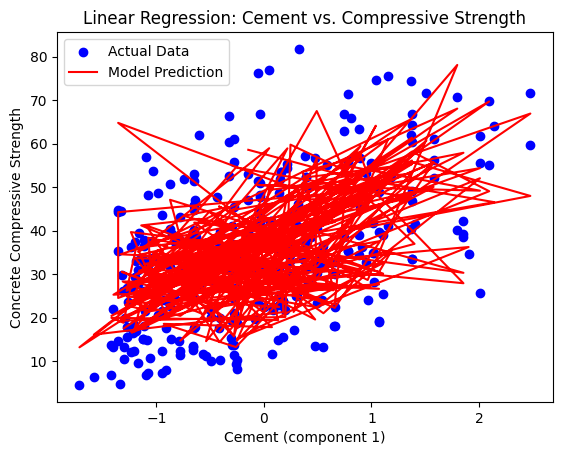

In [32]:
plt.scatter(X_test['Cement (component 1)(kg in a m^3 mixture)'], y_test, label='Actual Data', color='blue')

y_pred_linear_reg = linear_reg_model.predict(X_test)

plt.plot(X_test['Cement (component 1)(kg in a m^3 mixture)'], y_pred_linear_reg, label='Model Prediction', color='red')

plt.xlabel('Cement (component 1)')
plt.ylabel('Concrete Compressive Strength')
plt.title('Linear Regression: Cement vs. Compressive Strength')
plt.legend()

plt.show()


**2. Random Forrest**

In [33]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print('Random Forest Regressor Model')
print(f'MAE: {mae_rf}')
print(f'MSE: {mse_rf}')
print(f'RMSE: {rmse_rf}')
print(f'R-squared: {r2_rf}')
print('-' * 40)


Random Forest Regressor Model
MAE: 3.7402062542445127
MSE: 29.40837527543507
RMSE: 5.422948946416061
R-squared: 0.8913128035950946
----------------------------------------


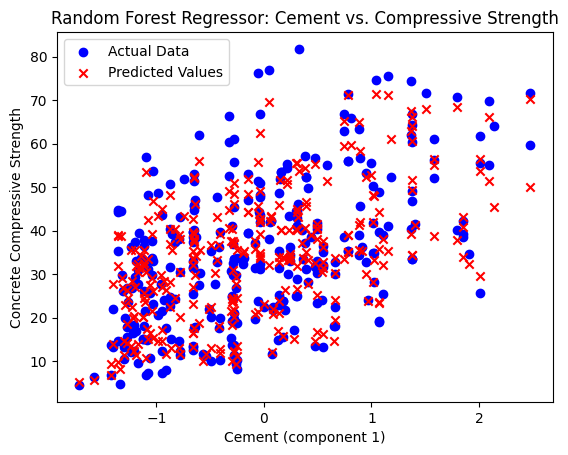

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor

plt.scatter(X_test['Cement (component 1)(kg in a m^3 mixture)'], y_test, label='Actual Data', color='blue')

y_pred_rf = rf_model.predict(X_test)

plt.scatter(X_test['Cement (component 1)(kg in a m^3 mixture)'], y_pred_rf, label='Predicted Values', color='red', marker='x')

plt.xlabel('Cement (component 1)')
plt.ylabel('Concrete Compressive Strength')
plt.title('Random Forest Regressor: Cement vs. Compressive Strength')
plt.legend()

plt.show()


**3. Support Vector Regression**

In [35]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

svr_model = SVR(kernel='linear')
svr_model.fit(X_train, y_train)

y_pred_svr = svr_model.predict(X_test)

mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print('Support Vector Regression (SVR) Model')
print(f'MAE: {mae_svr}')
print(f'MSE: {mse_svr}')
print(f'RMSE: {rmse_svr}')
print(f'R-squared: {r2_svr}')
print('-' * 40)


Support Vector Regression (SVR) Model
MAE: 8.316470472763788
MSE: 122.66405657064803
RMSE: 11.075380651275514
R-squared: 0.5466593348510236
----------------------------------------


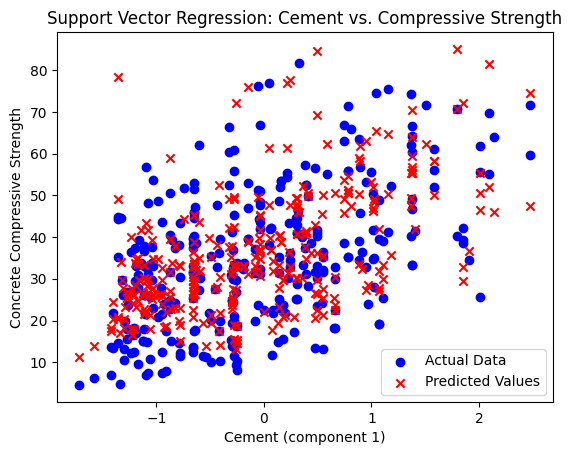

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVR

plt.scatter(X_test['Cement (component 1)(kg in a m^3 mixture)'], y_test, label='Actual Data', color='blue')

y_pred_svr = svr_model.predict(X_test)

plt.scatter(X_test['Cement (component 1)(kg in a m^3 mixture)'], y_pred_svr, label='Predicted Values', color='red', marker='x')

plt.xlabel('Cement (component 1)')
plt.ylabel('Concrete Compressive Strength')
plt.title('Support Vector Regression: Cement vs. Compressive Strength')
plt.legend()

plt.show()


**4. Multi-Layer Perceptron (MLP) Regression**

In [37]:
from sklearn.neural_network import MLPRegressor

mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)

y_pred_mlp = mlp_model.predict(X_test)

mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
rmse_mlp = np.sqrt(mse_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

print('Multi-Layer Perceptron (MLP) Regressor Model')
print(f'MAE: {mae_mlp}')
print(f'MSE: {mse_mlp}')
print(f'RMSE: {rmse_mlp}')
print(f'R-squared: {r2_mlp}')
print('-' * 40)


Multi-Layer Perceptron (MLP) Regressor Model
MAE: 3.670478714961773
MSE: 27.810714340082612
RMSE: 5.273586477918288
R-squared: 0.897217423834831
----------------------------------------


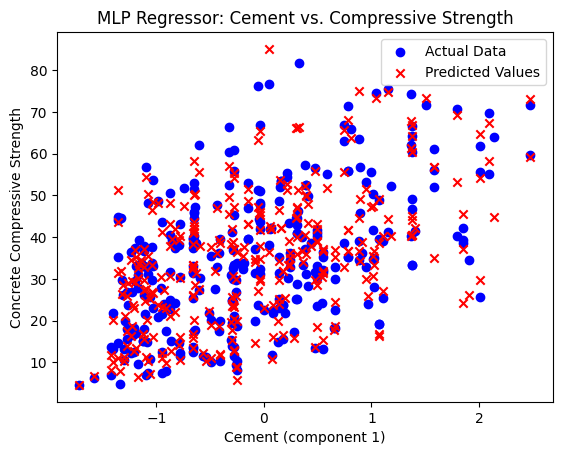

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neural_network import MLPRegressor

plt.scatter(X_test['Cement (component 1)(kg in a m^3 mixture)'], y_test, label='Actual Data', color='blue')

y_pred_mlp = mlp_model.predict(X_test)

plt.scatter(X_test['Cement (component 1)(kg in a m^3 mixture)'], y_pred_mlp, label='Predicted Values', color='red', marker='x')

plt.xlabel('Cement (component 1)')
plt.ylabel('Concrete Compressive Strength')
plt.title('MLP Regressor: Cement vs. Compressive Strength')
plt.legend()

plt.show()

**5. Gradient Boosting Regressors**

In [39]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print('Gradient Boosting Regressor Model')
print(f'MAE: {mae_gb}')
print(f'MSE: {mse_gb}')
print(f'RMSE: {rmse_gb}')
print(f'R-squared: {r2_gb}')
print('-' * 40)


Gradient Boosting Regressor Model
MAE: 4.066297546980037
MSE: 30.47928333844396
RMSE: 5.520804591583002
R-squared: 0.8873549516605449
----------------------------------------


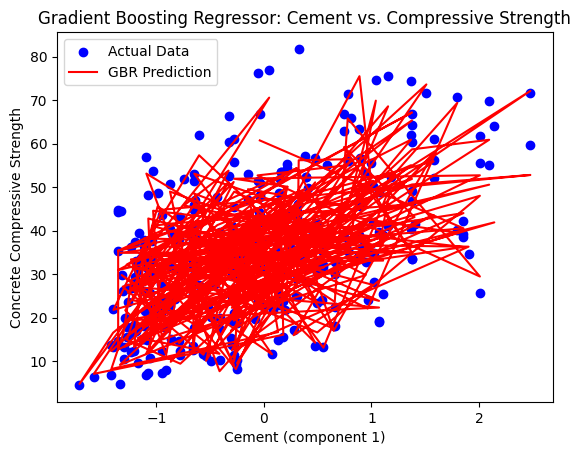

In [40]:
plt.scatter(X_test['Cement (component 1)(kg in a m^3 mixture)'], y_test, label='Actual Data', color='blue')

y_pred_gb = gb_model.predict(X_test)

plt.plot(X_test['Cement (component 1)(kg in a m^3 mixture)'], y_pred_gb, label='GBR Prediction', color='red')

plt.xlabel('Cement (component 1)')
plt.ylabel('Concrete Compressive Strength')
plt.title('Gradient Boosting Regressor: Cement vs. Compressive Strength')
plt.legend()

plt.show()


**6. K-Nearest Neighbors (KNN)**



In [41]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print('K-Nearest Neighbors (KNN) Regressor Model')
print(f'MAE: {mae_knn}')
print(f'MSE: {mse_knn}')
print(f'RMSE: {rmse_knn}')
print(f'R-squared: {r2_knn}')
print('-' * 40)

K-Nearest Neighbors (KNN) Regressor Model
MAE: 7.322894122718257
MSE: 88.41839763361486
RMSE: 9.403105744040895
R-squared: 0.6732241186598653
----------------------------------------


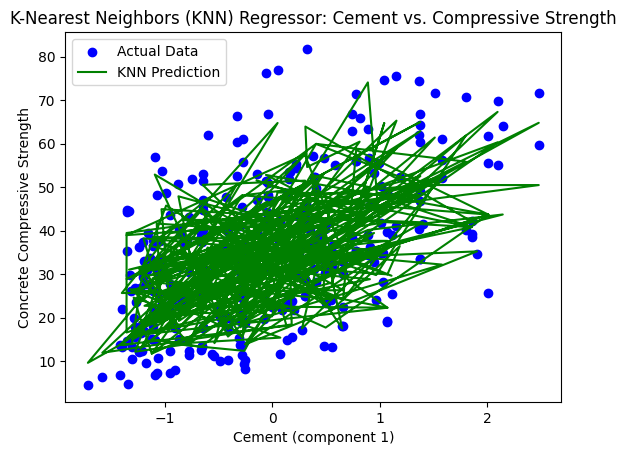

In [42]:
plt.scatter(X_test['Cement (component 1)(kg in a m^3 mixture)'], y_test, label='Actual Data', color='blue')

y_pred_knn = knn_model.predict(X_test)

plt.plot(X_test['Cement (component 1)(kg in a m^3 mixture)'], y_pred_knn, label='KNN Prediction', color='green')

plt.xlabel('Cement (component 1)')
plt.ylabel('Concrete Compressive Strength')
plt.title('K-Nearest Neighbors (KNN) Regressor: Cement vs. Compressive Strength')
plt.legend()

plt.show()

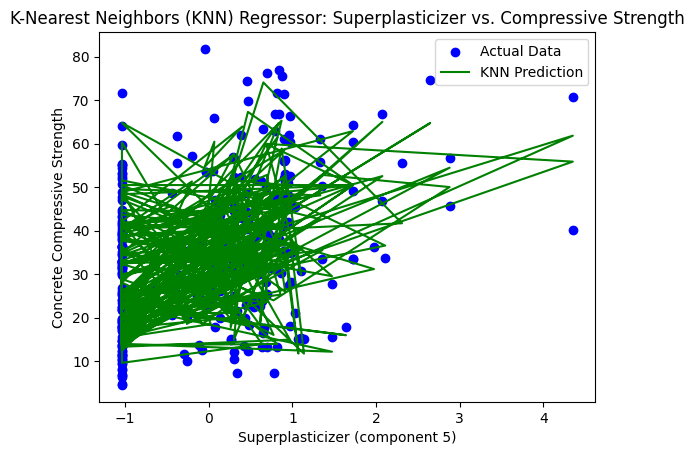

In [43]:
plt.scatter(X_test['Superplasticizer (component 5)(kg in a m^3 mixture)'], y_test, label='Actual Data', color='blue')

y_pred_knn = knn_model.predict(X_test)

plt.plot(X_test['Superplasticizer (component 5)(kg in a m^3 mixture)'], y_pred_knn, label='KNN Prediction', color='green')

plt.xlabel('Superplasticizer (component 5)')
plt.ylabel('Concrete Compressive Strength')
plt.title('K-Nearest Neighbors (KNN) Regressor: Superplasticizer vs. Compressive Strength')
plt.legend()

plt.show()